# Interpreting Data

Going to use the same housing market data set we started exploring last time!

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv("../housing_data.csv")

One of the first things you might want to look at to give you a feel for the data is the mean, or the average. You can get the average value in a column by doing:

In [11]:
data["price"].mean()

540088.1417665294

Sometimes the mean doesn't give you a super accurate measure of the center of your data set. This could be because there is some really large outlier messing up the average.

To achieve something closer to that center, we can look for the median. The median is the value where exactly 50% of the data set is smaller than the value and 50% of the data set is bigger than the value.

In [12]:
data[["sqft_living","price"]].median()

sqft_living      1910.0
price          450000.0
dtype: float64

Another key tool in your data interpretation arsenal is the *five number summary*. The five number summary includes the minimum value in your dataset, 25% value (also called Quartile 1, meaning that 25% of the data is below that value), the median (meaning that 50% of the data is below that), 75% (also called Quartile 3, meaning 75% of the data is below), and the maximum value in the data set.

Overall, the five number summary gives you a good idea of the characteristics and distribution of your data. To get the five number summary (and even more) in Pandas, use `.describe()`:

In [13]:
data[["sqft_living","price"]].describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


To do some calculation on the data while filtering by some specific category, you can use `groupby()`. For example, to get the average/mean price for houses with each number of bedrooms:

In [14]:
data[["bedrooms","price"]].groupby("bedrooms").mean()

,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


A neat way to represent the five number summary we talked about earlier is using a Box Plot. The box plot is described in the image below, where first quartile and third quartile are the 25% and 75% values we talked about. Unlike in the figure, some variations of the box plot (like the one used in Pandas) have the top bar of the plot representing maximum values that aren't outlier and shows all outliers as just dots.

![SegmentLocal](https://images.squarespace-cdn.com/content/v1/58cde3fcdb29d633eb688e9e/1552611652815-WPH9SFVAXK3R8I6NAM1J/Figure+1.png?format=1000w "segment")

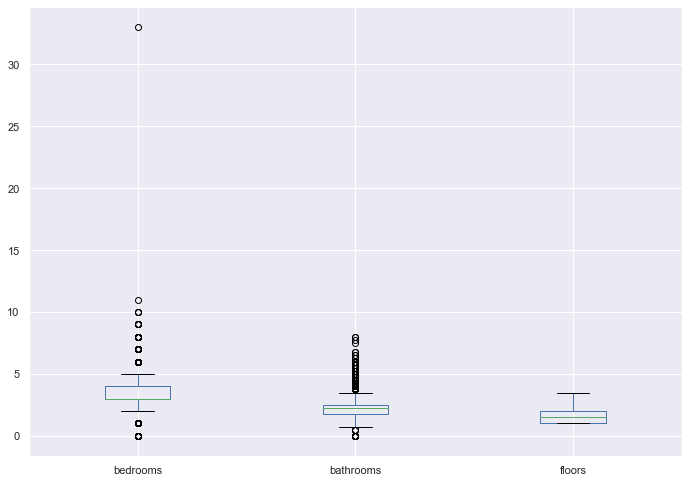

In [15]:
data.boxplot(column=["bedrooms","bathrooms","floors"])

We could also create a box plot without those outliers, allowing us to see the main part of the plot in more detail, by including the parameter `showfliers=False`

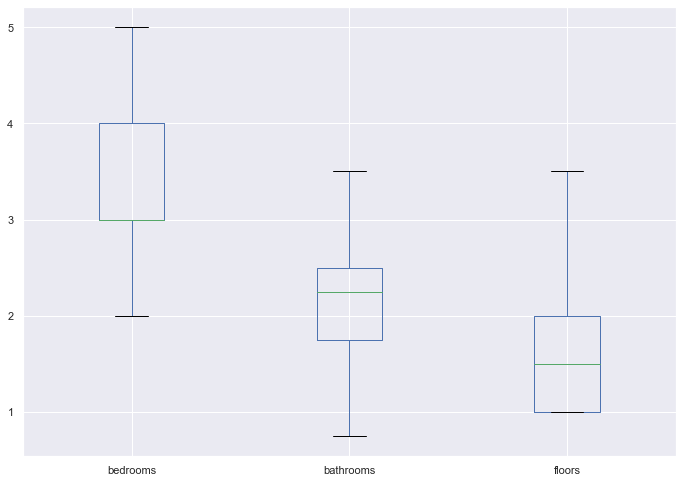

In [16]:
data.boxplot(column=["bedrooms","bathrooms","floors"], showfliers=False)

In [17]:
import seaborn as sns

The final and maybe most interesting way to explore a data set is to take a look at the correlation between all the values in the data. Correlation tells us how closesly certain variables or characteristics of a data set are related to others. A relation could be anything that helps us predict the value of one variable from the value of another (for example, a relationship could be that when one variable increases, another increases too).

If the correlation between two variables is 0 (0%), it mean's they're not related at all, and if the correlation is 1 (100%), it means they're perfectly related (so you can always predict the value of one variable fromt the value of another).

To visualize correlation, we can use a heatmap:

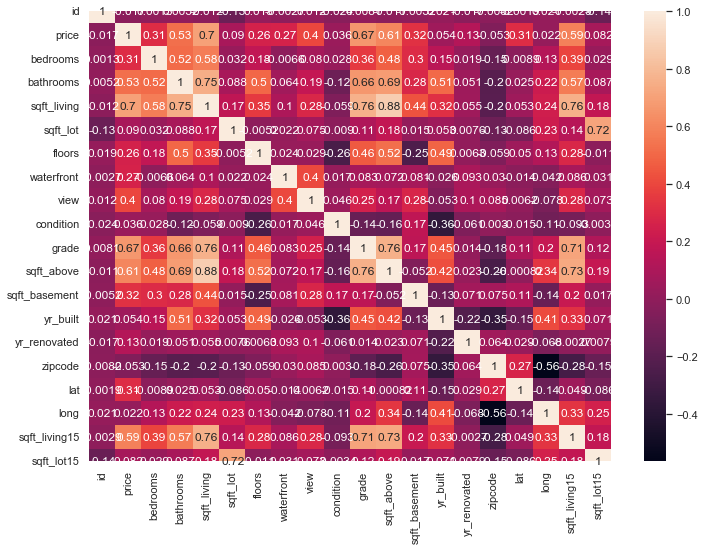

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlations = data.corr()
sns.heatmap(correlations, annot=True)

In this heatmap, the lighter the color, the higher the correlation. As you can tell, the correlation between a given variable and itself is always 1, because the value of that variable can predict itself perfectly.

Notice how the `sqft_living` and `price` have a fairly strong correlation (0.7, or 70%), so if we wanted to predict the price, we would consider using the squarefootage because there's a strong relationship between the two.